# SVM

This notebook uses a **Support Vector Machine** classifier, a discriminative model, to solve the classification task of digits labeling.

## Packages import

In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import SVM
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

Reading [MNIST handwritten digits](https://yann.lecun.com/exdb/mnist/) dataset.

In [2]:
data = read_datasets()

2022-12-26 15:30:34.973 | INFO     | assignment_2.digits_classifiers.io:read_datasets:46 - Reading datasets


In [3]:
X, y = data

## Removing constant columns

Removing constant-zero features.

In [4]:
X.shape

(70000, 784)

There are 65 pixels with constant value 0.

In [5]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]
len(always_zero)

65

In [6]:
X.drop(columns=always_zero, axis=1, inplace=True)
X.shape

(70000, 719)

## Train Test split

Splitting train and test set with **proportion 4:1**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

Combining feature space and labels

In [8]:
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

Digit distribution in the training set:

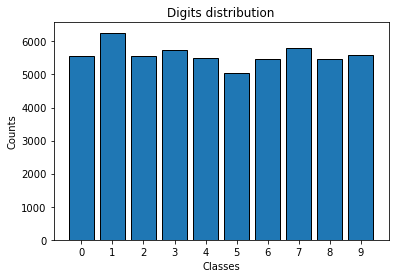

In [9]:
train.digit_distribution()

## Experimental Evaluation

### Validation Phase

Generating classifiers with candidate hyperparameters

Linear:

In [10]:
linears = [
    SVM(train=train, test=test, params={"kernel": 'linear', "C": c})
    for c in [1, 5, 10]
]
linears

Polynomial:

In [11]:
polys = [
    SVM(train=train, test=test, params={"kernel": 'poly', "C": c, "degree": d})
    for c in [1, 5, 10]
    for d in [2]
]
polys

RBF Kernel:

In [12]:
rbfs = [
    SVM(train=train, test=test, params={"kernel": 'rbf', "C": c})
    for c in [1, 5, 10]
]
rbfs

Adding them all:

In [13]:
svms = linears + polys + rbfs
svms

[[LinearSVM: Train 56000, Test 14000, not fitted, not predicted][C: 1],
 [LinearSVM: Train 56000, Test 14000, not fitted, not predicted][C: 5],
 [LinearSVM: Train 56000, Test 14000, not fitted, not predicted][C: 10],
 [PolynomialSVM: Train 56000, Test 14000, not fitted, not predicted] [C: 1; degree: 2],
 [PolynomialSVM: Train 56000, Test 14000, not fitted, not predicted] [C: 5; degree: 2],
 [PolynomialSVM: Train 56000, Test 14000, not fitted, not predicted] [C: 10; degree: 2],
 [RBFKernelSVM: Train 56000, Test 14000, not fitted, not predicted][C: 1],
 [RBFKernelSVM: Train 56000, Test 14000, not fitted, not predicted][C: 5],
 [RBFKernelSVM: Train 56000, Test 14000, not fitted, not predicted][C: 10]]

Restricting Train set cardinality for validation phase to 30%

In [14]:
_, X_train_cv, _, y_train_cv = train_test_split(X_train, y_train, test_size=0.30)
train_cv = Dataset(x=X_train_cv, y=y_train_cv)

In [15]:
X_train_cv.shape

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
12021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Generating tuning class

In [16]:
tuning_svms = ClassifierTuning(classifiers=svms, base_estimator=SVM.default_estimator(), data=train_cv, k=10)
tuning_svms

[Estimator: SVC(); K: 10; Params: {'degree': [2, 3], 'kernel': ['rbf', 'linear', 'poly'], 'C': [1, 10, 5]}]

Evaluating 10-fold Cross-Validation

In [17]:
%%time
tuning_svms.evaluate()

Wall time: 45min 43s


Selected model with rbf kernel and a regularization factor of 10:

In [18]:
tuning_svms.best_params

{'C': 10, 'degree': 2, 'kernel': 'rbf'}

Accuracy of the selected model:

In [19]:
tuning_svms.best_score

0.9739880952380953

### Training phase

Generating the model with tuned hyperparameters

In [20]:
best_svm = SVM(train=train, test=test, params=tuning_svms.best_params)
best_svm

[RBFKernelSVM: Train 56000, Test 14000, not fitted, not predicted][C: 10]

Training the model

In [21]:
%%time
best_svm.train()

Wall time: 2min 34s


### Predicting phase

Evaluating predictions

In [22]:
%%time
best_svm.predict()

Wall time: 4min 46s


Accuracy on Test set:

In [23]:
best_svm.accuracy

0.9832142857142857

Plot confusion matrix:

2022-12-24 14:28:38.946 | INFO     | assignment_2.digits_classifiers.model:confusion_matrix:197 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\svm_cm


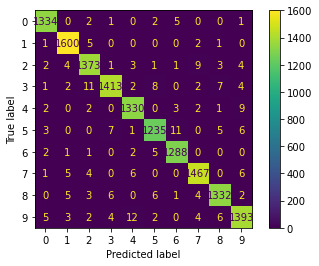

In [24]:
best_svm.confusion_matrix(save=True, file_name='svm_cm')

### Fool data

Behaviour on fool data

In [25]:
from assignment_2.digits_classifiers.io import read_fool_dataset

X_fool = read_fool_dataset()
X_fool.drop(columns=always_zero, axis=1, inplace=True)

In [26]:
best_svm.estimator.predict(X=X_fool)

array([4, 4, 2, 3, 1, 2])